# Correlation study

**Motivation:** I want to *justify* using just one set of NPs instead of 4!!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

from argparse import ArgumentParser

from matplotlib.ticker import AutoLocator, AutoMinorLocator, MultipleLocator,FixedLocator, LogLocator
import matplotlib.font_manager as font_manager
import logging
from matplotlib import rcParams

import matplotlib.font_manager as font_manager

# Stuff from Sean's stats fw
import os
os.sys.path += ['../non-resonant-studies/', '../stats-results/']
from pull_imp_utils import *
from postFit_4cats import get_bin_edgs

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

Using uproot4


../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


**Set the parameters defining this notebook**

In [23]:
yr = 18

r = (275,1050)
res = 0.08

In [24]:
resStr = f'{res}'.replace('.','p')

ws_file = '../stats-results/var_bins/ws-3b1f-systs-HTcut-300.0-dEta_hh-cat{}'
ws_file += '-{}-SM-HH-unblind-275_1050_res_{}_{}.json'

In [25]:
edg = get_bin_edgs(r,res)

edg = np.array(edg)

In [26]:
figDir = 'figures/Xhh_cats'

**Load in the workspaces**

In [27]:
with open(ws_file.format('',yr,resStr,'2_deta_2_Xhh')) as f:
    ws_uu = pyhf.Workspace(json.load(f))
    
with open(ws_file.format('',yr,resStr,'2_deta_2_Xhh_corr')) as f:
    ws_uc = pyhf.Workspace(json.load(f))
    
with open(ws_file.format('-corr',yr,resStr,'2_deta_corr_2_Xhh')) as f:
    ws_cu = pyhf.Workspace(json.load(f))
    
with open(ws_file.format('-corr',yr,resStr,'2_deta_corr_2_Xhh_corr')) as f:
    ws_cc = pyhf.Workspace(json.load(f))
    

In [28]:
def get_postfit_bkg(ws):
    '''
    Return the post-fit distribution + the error
    '''
    
    model, data, bestfit, errors, obj = fitresults(ws,fix_poi=0, return_result_obj=True)
    corr_mat = np.asarray(obj.corr)
    
    postfit = model.expected_actualdata(bestfit) 
    postfit_err = calculate_stdev(model, bestfit, errors, corr_mat) 
    
    return postfit, postfit_err

In [29]:
%%time

b_uu, e_uu = get_postfit_bkg(ws_uu)

CPU times: user 6.28 s, sys: 25.9 ms, total: 6.31 s
Wall time: 6.28 s


In [30]:
b_uu, e_uu = get_postfit_bkg(ws_uu)
b_uc, e_uc = get_postfit_bkg(ws_uc)
b_cu, e_cu = get_postfit_bkg(ws_cu)
b_cc, e_cc = get_postfit_bkg(ws_cc)

In [31]:
base_n = len(b_uu)//4
base_n

18

In [32]:
xx = 0.5 * (edg[:-1] + edg[1:])

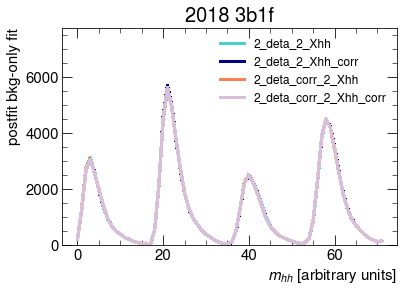

In [33]:
plt.plot(b_uu,color='mediumturquoise',label='2_deta_2_Xhh')
plt.plot(b_uc,color='navy',label='2_deta_2_Xhh_corr')
plt.plot(b_cu,color='coral',label='2_deta_corr_2_Xhh')
plt.plot(b_cc,color='thistle',label='2_deta_corr_2_Xhh_corr')

plt.xlabel('$m_{hh}$ [arbitrary units]',x=1,ha='right')
plt.ylabel('postfit bkg-only fit',y=1,ha='right')
plt.title(f'20{yr} 3b1f',fontsize=20)
plt.legend(fontsize=12)

_,ymax = plt.ylim()
plt.ylim(0,1.3*ymax)

plt.savefig(f'{figDir}/post_pred_{yr}.pdf',bbox_inches='tight')

In [34]:
corrOpts = ['deta_Xhh','deta_Xhh_corr','deta_corr_Xhh','deta_corr_Xhh_corr']
catOpts = ['SRin, deta < 0.75','SRout, deta < 0.75','SRin, deta > 0.75','SRout, deta > 0.75']

In [35]:
df = pd.DataFrame(0,range(base_n),pd.MultiIndex.from_product([catOpts,corrOpts]))

df.loc[range(18),(slice(None),'deta_Xhh')]           = b_uu.reshape(4,base_n).T
df.loc[range(18),(slice(None),'deta_Xhh_corr')]      = b_uc.reshape(4,base_n).T
df.loc[range(18),(slice(None),'deta_corr_Xhh')]      = b_cu.reshape(4,base_n).T
df.loc[range(18),(slice(None),'deta_corr_Xhh_corr')] = b_cc.reshape(4,base_n).T

In [36]:
df[catOpts[:2]]

SRin, deta < 0.75                                                 \
            deta_Xhh deta_Xhh_corr deta_corr_Xhh deta_corr_Xhh_corr   
0         215.058294    211.959790    217.391824         212.681776   
1        1282.183798   1262.416896   1293.711464        1265.189188   
2        2741.602259   2700.891355   2744.179841        2694.965548   
3        3116.945730   3088.448168   3082.299090        3064.559445   
4        2604.806086   2598.398920   2579.096355        2583.382075   
5        1967.418788   1972.622787   1990.530060        1986.023606   
6        1417.758986   1424.133728   1446.016849        1440.522835   
7         965.038738    969.028127    982.725190         979.287864   
8         682.981598    683.893254    687.038852         686.261153   
9         503.172801    503.576379    504.976138         504.628780   
10        401.106367    400.677701    399.204206         399.581818   
11        286.636836    286.485771    285.967760         286.098950   
12        213.821274    213.234896    211.200926         211.714878   
13        142.717007    142.625755    142.312060         142.391315   
14         97.529370     97.526008     97.513250          97.516588   
15         61.890277     62.256435     63.511910          63.198619   
16         35.624225     35.904079     36.861022          36.621210   
17         22.990848     23.431748     24.907482          24.546806   

   SRout, deta < 0.75                                                 
             deta_Xhh deta_Xhh_corr deta_corr_Xhh deta_corr_Xhh_corr  
0          526.605186    534.507890    526.594532         538.257178  
1         2128.753021   2155.674124   2126.871124        2162.511420  
2         4513.051336   4556.586848   4501.605370        4540.421053  
3         5645.511372   5683.553506   5622.491096        5626.679904  
4         4956.015896   4970.828198   4942.476979        4933.563128  
5         3776.893779   3772.146049   3781.393813        3784.698208  
6         2737.330130   2728.158373   2746.037068        2752.445228  
7         1864.613675   1858.396918   1870.519077        1874.860861  
8         1309.785520   1307.085445   1312.349151        1314.262946  
9          962.829655    961.313323    964.266850         965.334928  
10         744.443475    744.557052    744.328484         744.251430  
11         536.564908    536.720888    536.418094         536.310101  
12         389.103578    389.491016    388.732622         388.460237  
13         286.451057    286.383173    286.514642         286.561982  
14         184.933744    184.879109    184.984123         185.024253  
15         110.924197    110.321461    111.500280         111.925305  
16          66.730630     66.194304     67.240373          67.612586  
17          52.508556     51.235951     53.698427          54.557481

In [37]:
df[catOpts[2:]]

SRin, deta > 0.75                                                 \
            deta_Xhh deta_Xhh_corr deta_corr_Xhh deta_corr_Xhh_corr   
0         100.936667    100.592203    103.709819         102.138942   
1         514.355439    512.976629    523.571237         518.036887   
2        1357.799645   1354.422522   1374.545453        1363.286559   
3        2239.197615   2234.726486   2260.931774        2246.183721   
4        2515.553203   2509.172545   2517.925074        2508.421080   
5        2248.357912   2237.133065   2232.392207        2223.788429   
6        1888.452518   1870.495088   1864.429566        1849.992013   
7        1437.058270   1420.869776   1415.983603        1402.731910   
8         990.238119    979.860061    976.747203         968.234079   
9         671.906586    667.229179    665.829164         662.020298   
10        501.354800    499.241188    498.609840         496.893564   
11        356.237675    355.643431    355.466419         354.988887   
12        274.566714    274.692074    274.729734         274.832088   
13        206.685737    206.446048    206.374755         206.179816   
14        147.204384    147.541949    147.643004         147.918876   
15         99.005868     99.411399     99.532677          99.862804   
16         63.683489     63.933576     64.008447          64.212060   
17         84.731345     83.740836     83.443202          82.620205   

   SRout, deta > 0.75                                                 
             deta_Xhh deta_Xhh_corr deta_corr_Xhh deta_corr_Xhh_corr  
0          228.165494    231.172324    232.305793         235.687016  
1          884.548541    892.760999    896.009376         905.322755  
2         2288.750452   2302.649326   2309.999840        2326.337979  
3         3864.164336   3876.828401   3886.494116        3902.237720  
4         4490.389459   4498.035330   4498.450343        4506.570227  
5         4198.497313   4209.605226   4190.766973        4197.440099  
6         3460.431908   3482.224059   3445.011745        3458.038085  
7         2591.509747   2615.500471   2575.435546        2590.060670  
8         1837.193807   1853.072161   1826.569548        1836.264188  
9         1308.950354   1318.183772   1302.766289        1308.412129  
10         940.493357    944.974947    937.498664         940.262035  
11         705.667236    707.350696    704.543629         705.568168  
12         531.514446    531.538175    531.494880         531.514267  
13         375.543879    375.107425    375.831664         375.569482  
14         263.283308    262.561793    263.763545         263.326866  
15         182.963873    182.858322    183.032533         182.972451  
16         119.750386    120.009137    119.577114         119.736823  
17         160.337483    161.941557    159.247495         160.246362

Maybe would be useful to divide by observed right here?

In [38]:
e_uu.shape

(4, 18)

In [39]:
titles = [
    '$\Delta \eta_{hh}< 0.75$, $X_{hh} < 0.95$',
    '$\Delta \eta_{hh}< 0.75$,  $0.95 < X_{hh}$ < 1.6',
    '$0.75 < \Delta \eta_{hh} < 1.5$, $X_{hh} < 0.95$',
    '$0.75 < \Delta \eta_{hh} < 1.5$,  $0.95 < X_{hh}$ < 1.6'
]

In [40]:
w = edg[1:]-edg[:-1]

In [41]:
lw=2.5

kwargs = {'bins':edg,'histtype':'step','lw':lw}

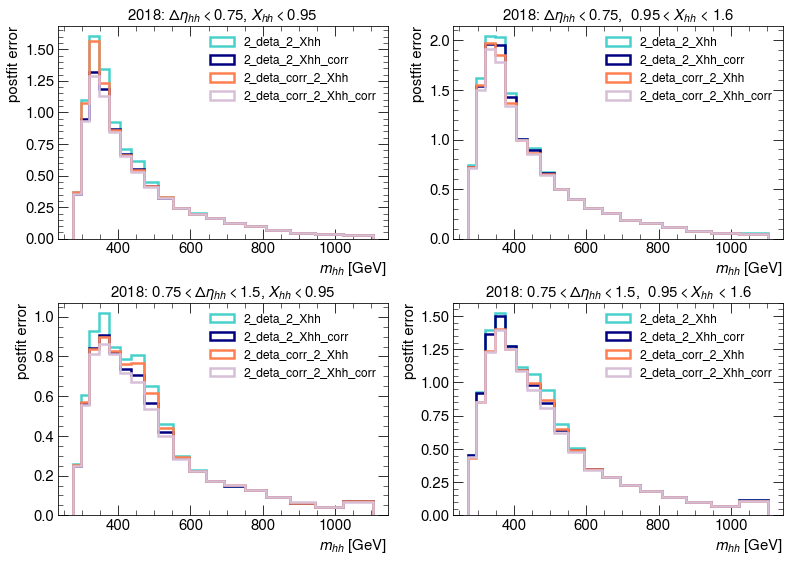

In [42]:
fig, axes = plt.subplots(2,2,figsize=(13,9),gridspec_kw={"wspace":0.2,"hspace":0.3})

for i, (ax,title) in enumerate(zip(axes.flatten(),titles)):
    
    ax.hist(xx, weights=e_uu[i]/w, label='2_deta_2_Xhh',color='mediumturquoise',**kwargs)
    ax.hist(xx, weights=e_uc[i]/w, label='2_deta_2_Xhh_corr',color='navy',**kwargs)
    ax.hist(xx, weights=e_cu[i]/w, label='2_deta_corr_2_Xhh',color='coral',**kwargs)
    ax.hist(xx, weights=e_cc[i]/w, label='2_deta_corr_2_Xhh_corr',color='thistle',**kwargs)
    
    ax.legend(fontsize=12)
    ax.set_xlabel('$m_{hh}$ [GeV]',x=1,ha='right')
    ax.set_ylabel('postfit error',y=1,ha='right')
    ax.set_title(f'20{yr}: '+title,fontsize=15)
    
plt.savefig(f'{figDir}/post_fit_err_{yr}.pdf',bbox_inches='tight')

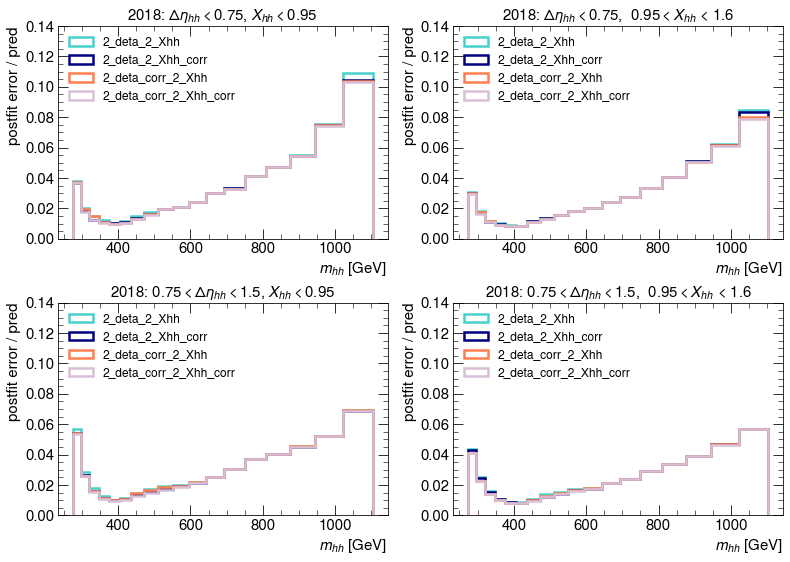

In [43]:
fig, axes = plt.subplots(2,2,figsize=(13,9),
                         gridspec_kw={"wspace":0.2,"hspace":0.3})

for i, (ax,title) in enumerate(zip(axes.flatten(),titles)):
    
    ax.hist(xx,weights=e_uu[i]/b_uu[i*base_n: (i+1)*base_n],
            label='2_deta_2_Xhh',color='mediumturquoise',**kwargs)
    ax.hist(xx,weights=e_uc[i]/b_uc[i*base_n: (i+1)*base_n],
            label='2_deta_2_Xhh_corr',color='navy',**kwargs)
    ax.hist(xx,weights=e_cu[i]/b_cu[i*base_n: (i+1)*base_n],
            label='2_deta_corr_2_Xhh',color='coral',**kwargs)
    ax.hist(xx,weights=e_cc[i]/b_cc[i*base_n: (i+1)*base_n],
            label='2_deta_corr_2_Xhh_corr',color='thistle',**kwargs)
    
    ax.legend(fontsize=12,loc='upper left')
    ax.set_xlabel('$m_{hh}$ [GeV]',x=1,ha='right')
    ax.set_ylabel('postfit error / pred',y=1,ha='right')
    ax.set_title(f'20{yr}: '+title,fontsize=15)
    
    ax.set_ylim(0,0.14)
    
plt.savefig(f'{figDir}/post_fit_rel_err_{yr}.pdf',bbox_inches='tight')